**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [1]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
X = np.append(trainX , testX,axis=0)
y = np.append(trainy , testy,axis=0)
n1 , n2 , n3 = X.shape
X = X.flatten().reshape(n1,n2*n3)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
#Splitting The Datasets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49000, 784)
(21000, 784)
(49000,)
(21000,)


In [4]:
df  = pd.DataFrame(X_train)
df.describe()
# Since the data is already uniformly distributed in range(0,255) so normalising the dataset won't make a much difference

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.00000,49000.000000,49000.000000,49000.000000,49000.000000,...,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000
mean,0.000592,0.007265,0.038633,0.102653,0.255551,0.409469,0.788082,2.186388,5.684184,14.417163,32.924388,45.915020,52.196061,50.997143,50.700551,54.162633,51.650286,40.639347,26.146959,10.407429,4.065265,1.945265,1.178347,0.848265,0.477429,0.265816,0.100918,0.020122,0.006592,0.025265,0.112347,0.366408,0.776327,2.021796,7.219082,17.42598,31.970816,52.812408,79.730980,100.227714,...,92.618388,90.648980,79.297143,62.609204,46.116837,44.127571,47.876571,38.739857,22.203041,9.079612,3.783714,0.621939,0.026286,0.219653,1.008490,4.359673,12.599041,20.809510,21.131122,17.275857,22.306735,30.603265,41.875653,51.697816,52.795878,46.451469,42.512041,45.260204,50.197469,46.536367,34.622980,23.314184,16.708449,17.840755,22.915041,18.011939,8.519327,2.787102,0.863714,0.076837
std,0.079922,0.340214,1.408733,2.520925,4.502132,5.956605,8.136210,13.999075,23.741946,38.124541,57.586130,66.108156,68.743552,68.036585,67.529555,69.738158,68.142218,62.860422,51.764977,32.511753,19.992891,13.873937,10.781300,9.225849,7.109163,5.246815,2.982701,1.273656,0.543781,1.282189,3.293089,6.418040,9.943302,15.601259,29.770186,47.95779,65.548630,81.953206,95.380068,99.839695,...,100.959986,99.845508,95.254768,88.936088,78.746716,77.006471,83.254417,74.352265,55.731472,37.615230,24.459985,8.250189,1.068809,4.510720,9.966929,20.759868,36.812501,48.744523,48.134392,42.364551,48.505545,54.988593,62.111179,68.500296,69.879112,67.431286,66.263181,66.730044,68.736883,66.101237,57.594809,48.940424,42.200677,43.856442,51.843586,45.241650,29.431486,17.600896,9.435678,2.179648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000

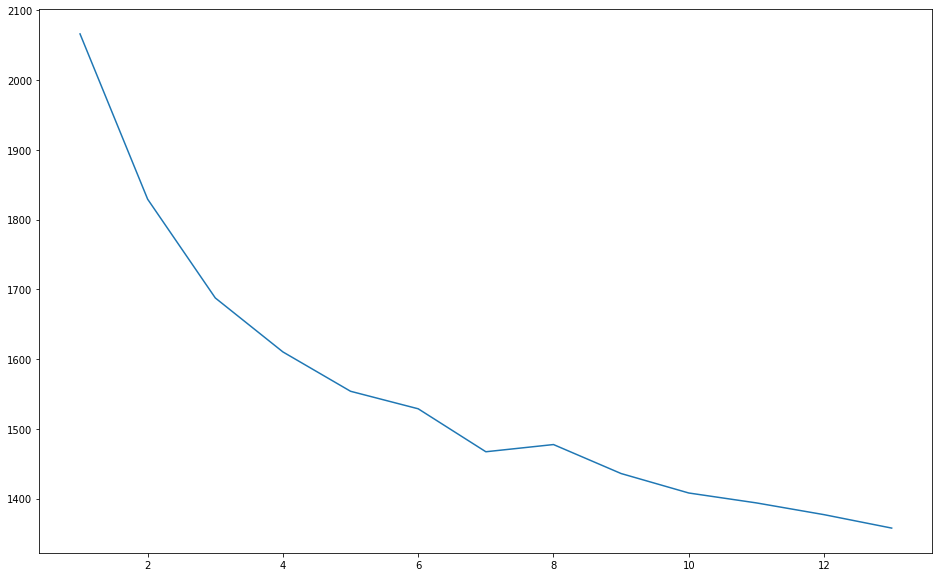

In [ ]:
#implement elbow method from scratch
def elbow():
  distances = np.zeros((14,X_train.shape[0]))
  for c in range(1,14):
    k = Kmeans()
    k.fit(X_train,y_train,c)
    k.train(10)
    centers = k.get_centers()
    
    j=0
    for x in X_train:
      i=0
      dist = np.zeros(centers.shape[0])
      for y in centers:
        dist[i] = np.sum((x-y)**2)**0.5
        i=i+1
      distances[c][j] = np.min(dist)
      j=j+1
  mean_dist = np.mean(distances,axis=1)
  plt.figure(figsize=(16,10))
  x_axis = [x for x in range(1,14)]
  plt.plot(x_axis,mean_dist[1:])
  plt.show()
  
  

elbow()

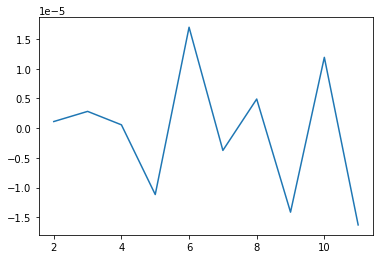

In [ ]:
#implement silhouette method from scratch
def compute_distances(b,a):
  distances = -2 * b@a.T + np.sum(a**2,axis=1) +np.sum(b**2,axis=1)[:,np.newaxis]
  return distances


def get_dist(X_train,indices1,indices2):
  dist = compute_distances(X_train[indices1, :] , X_train[indices2,:])
  return np.mean(np.mean(dist,axis=1))
  

def silhouette():
  silhouette_scores = []
  for c in range(2,12):
    k = Kmeans()
    k.fit(X_train,y_train,c)
    k.train(10)
    centers = k.get_centers()
    nearest_centers = np.zeros((c,c))
    for i in range(c):
      for j in range(c):
        nearest_centers[i][j] = np.sum((centers[i]-centers[j])**2)**0.5
        if nearest_centers[i][j] ==0:
          nearest_centers[i][j]=2333332323232 #Random Large Number INT_MAX

    nearest_centers = np.argmin(nearest_centers,1)
    labels = k.get_labels()
    coeffi = np.zeros(X_train.shape[0])
    indices = []
    for i in range(c):
      indices.append(np.argwhere(labels==i).flatten())
    
    for i in range(c):
      a = get_dist(X_train,indices[i],indices[i])
      b = get_dist(X_train,indices[nearest_centers[i]],indices[i])
      coeffi[i] = (b - a) / max(b,a)

    silhouette_scores.append(np.mean(coeffi))
  plt.figure()
  plt.plot([x for x in range(2,12)],silhouette_scores)
  plt.show()

silhouette()

In [ ]:
#implement Kmeans from scratch
class Kmeans:
  def __init__(self):
    pass

  def forgy_method(self):
    indices = np.random.randint(self.m,size=self.K)
    return self.X_train[indices,:]

  def random_partition(self):
    labels = np.random.randint(self.K,size=self.m)
    centers = np.ones((self.K,self.n))
    for i in range(self.K):
      indices = np.argwhere(labels==i).flatten()
      centers[i] = np.mean(X_train[indices,:],axis=0)
    return centers

  def fit(self,X_train,y_train,K,init='kmeanplusplus'):
    self.X_train = X_train
    self.y_train = y_train
    self.m , self.n = self.X_train.shape
    self.K = K
    if init == 'forgy':
      self.centers = self.forgy_method()
    elif init == 'random-partition':
      self.centers = self.random_partition()
    else:
      self.centers = np.ones((self.K ,self.n))
      self.centers[0] = self.X_train[np.random.randint(self.m),:] 
      for k in range(self.K-1):
        i=0
        distances = np.ones(self.m)
        for x in self.X_train:
          dist = np.ones(k+1)
          j=0
          for y in range(k+1):
            dist[j] = np.sum((x-self.centers[y])**2)
            j=j+1
          distances[i] = np.min(dist)
          i=i+1
        prob = np.cumsum(distances/np.sum(distances))
        r = np.random.rand(1)
        indice = np.searchsorted(prob,r,side='left')
        self.centers[k+1] = self.X_train[indice,:]
    
    # print(self.centers.shape)
    # self.centers = np.random.randint(256,size=(self.K,self.m)) #Random Intilization for centers
  
  def train(self,iter,d='euclidean'):
    self.ypredicted = np.ones(self.m)
    
    for k in range(iter):
      distances = np.zeros((self.m,self.K))
      i=0
      for x in self.X_train:
        j=0
        for y in self.centers:
          if d=='euclidean':
            distances[i][j] = np.sum((x-y)**2)
          else:
            distances[i][j] = np.sum(abs(x-y))
          j=j+1
        i=i+1
      self.labels = np.argmin(distances,1)
      old_center = np.copy(self.centers)
      for i in range(self.K):
        indices = np.argwhere(self.labels==i).flatten()
        self.ypredicted[indices] = i
        self.centers[i] = np.mean(self.X_train[indices,:],axis=0)

      if np.all(old_center==self.centers):
        break
      
      homogeneity_completeness_v_measure(self.y_train,self.ypredicted)

  def get_prediction(self):
    return self.ypredicted
  def get_centers(self):
    return self.centers
  def get_labels(self):
    return self.labels


  

In [ ]:
#Random Partition
k = Kmeans()
k.fit(X_train,y_train,10,init='random-partition')
k.train(10)
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.4885363579091503, 0.4972838518447486, 0.4928712952393522)

In [ ]:
#Forgy Method
k = Kmeans()
k.fit(X_train,y_train,10,init='forgy')
k.train(10)
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.13782487786151898, 0.28336797071773423, 0.18545023300265953)

In [ ]:
#Kmeanplusplus
k = Kmeans()
k.fit(X_train,y_train,10)
k.train(10)
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.5267984265739365, 0.5568952501697049, 0.5414289071750287)

In [ ]:
#Kmeans on test Data
kt = Kmeans()
kt.fit(X_test,y_test,10,init='random-partition')
kt.train(10)
ypredict = kt.get_prediction()
homogeneity_completeness_v_measure(y_test,ypredict)

(0.4961968196302049, 0.5200867448043707, 0.5078609902489828)

In [ ]:
#Kmeans with manhattan
k = Kmeans()
k.fit(X_train,y_train,10,init='random-partition')
k.train(10,'manhattan')
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.5050450266561571, 0.5434888012311748, 0.5235621566128736)

In [ ]:
#Kmeans with manhattan
k = Kmeans()
k.fit(X_train,y_train,10)
k.train(10,'manhattan')
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.4914151112190731, 0.5261559189303235, 0.5081924735647347)

In [ ]:
t = TSNE(learning_rate=50)
t_features = t.fit_transform(X_train)
t_features

array([[ 25.592583  ,  15.855554  ],
       [ -6.1632986 ,   9.076665  ],
       [  4.7809    , -29.34535   ],
       ...,
       [ -0.31554958,  32.114822  ],
       [ -2.7385201 , -17.819986  ],
       [  1.9321216 , -16.338081  ]], dtype=float32)

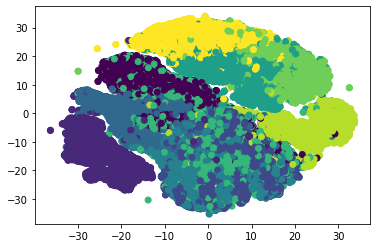

In [ ]:
x = t_features[:,0]
y = t_features[:,1]
plt.figure()
plt.scatter(x,y,c=y_train)
plt.show()

In [ ]:
x = t_features[:,0]
y = t_features[:,1]
plt.figure()
plt.scatter(x,y,c=y_)
plt.show()

In [ ]:
#sklearn Implementation Kmeans

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(kmeans.cluster_centers_)
print(homogeneity_completeness_v_measure(y,y_kmeans))
confusion_matrix(y, y_kmeans)


[[ 1.08420217e-17  1.82252764e-02  1.82252764e-02 ...  1.21819540e+01
   5.59635494e+00  4.26650732e-01]
 [ 2.00400802e-03  2.30460922e-02  9.88643955e-02 ...  9.01636607e+00
   3.80427522e+00  4.84635939e-01]
 [ 4.44286476e-04  9.33001599e-03  5.21592323e-02 ...  6.36866892e+00
   8.93193531e-01  5.06486583e-02]
 ...
 [ 8.81456366e-17  2.02962647e-16 -2.73392420e-15 ...  5.41788836e-14
  -1.13242749e-13  6.70297151e-15]
 [ 1.56372166e-03  3.01574891e-03  1.99932983e-02 ...  3.13950631e+00
   1.34312521e+00  8.47760527e-02]
 [ 3.40947835e-04  8.63734515e-03  6.23934538e-02 ...  2.56836004e+00
   5.49607910e-01  5.79611319e-02]]
(0.5008219374443051, 0.524233562045191, 0.5122603963347495)


array([[   0,   33,  202,  229, 3999,   27,    0,    3,  670, 1837],
       [   0,    0,   72, 6307,  288,    3,    0,    0,  173,  157],
       [   1,   30, 4090,   13,  136,   30,    0,    1,  562, 2137],
       [   0,   10,   59, 3712, 1962,    7,    0,    0,  609,  641],
       [   0,   34, 4223,  182, 1016,   19,    0,    0,  289, 1237],
       [ 298,   13,    0,    1,    2,    4,  542, 1669, 4435,   36],
       [   1,   17, 2270,   72, 1248,   76,    0,    6,  874, 2436],
       [  24,    0,    0,    0,    0,    1,  911, 5490,  574,    0],
       [   7, 2855,  336,   32,   26, 2555,   63,  277,  568,  281],
       [3016,    2,    1,    2,    2,    4, 3533,  203,  199,   38]])

In [ ]:
#sklearn Implementation Kmeans++

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
kmeans = KMeans(n_clusters=10, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(kmeans.cluster_centers_)
print(homogeneity_completeness_v_measure(y,y_kmeans))
confusion_matrix(y, y_kmeans)

[[ 2.99539171e-03  1.08294931e-02  7.75345622e-02 ...  8.26036866e-02
   2.21198157e-02  2.64976959e-03]
 [ 8.81456366e-17  2.02962647e-16 -2.73392420e-15 ...  5.41788836e-14
  -1.13242749e-13  6.70297151e-15]
 [ 4.44286476e-04  9.33001599e-03  5.21592323e-02 ...  6.36866892e+00
   8.93193531e-01  5.06486583e-02]
 ...
 [-2.04914211e-17  1.46735143e-03  2.05429200e-02 ...  6.31327953e-01
   4.84592810e-01  1.33162142e-01]
 [ 1.56372166e-03  3.01574891e-03  1.99932983e-02 ...  3.13950631e+00
   1.34312521e+00  8.47760527e-02]
 [ 8.97719399e-17  2.10768902e-16 -4.16333634e-15 ... -2.38919995e-13
  -1.26787469e-13 -4.23272528e-15]]
(0.5008219374443051, 0.5242335620451909, 0.5122603963347494)


array([[3999,    3,  202,    0,   33,    0, 1837,   27,  670,  229],
       [ 288,    0,   72,    0,    0,    0,  157,    3,  173, 6307],
       [ 136,    1, 4090,    1,   30,    0, 2137,   30,  562,   13],
       [1962,    0,   59,    0,   10,    0,  641,    7,  609, 3712],
       [1016,    0, 4223,    0,   34,    0, 1237,   19,  289,  182],
       [   2, 1669,    0,  298,   13,  542,   36,    4, 4435,    1],
       [1248,    6, 2270,    1,   17,    0, 2436,   76,  874,   72],
       [   0, 5490,    0,   24,    0,  911,    0,    1,  574,    0],
       [  26,  277,  336,    7, 2855,   63,  281, 2555,  568,   32],
       [   2,  203,    1, 3016,    2, 3533,   38,    4,  199,    2]])

# PART 2

In [ ]:
import pandas as pd

!gdown --id 15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY

Downloading...
From: https://drive.google.com/uc?id=15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY
To: /content/data.csv
191MB [00:01, 122MB/s]


In [ ]:
# Loading and Cleaning The Dataset
df = pd.read_csv('data.csv', header=None)
df = df.reset_index(drop=True)
df[0] = df[0].apply(lambda x: x.strip('['))
df[191] = df[191].apply(lambda x: x.strip(']'))
df = df.astype({0:'float64',191:'float64', 192:'category'})
df[192] = df[192].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 193 entries, 0 to 192
dtypes: float64(192), int8(1)
memory usage: 87.9 MB


In [ ]:
X = df[[x for x in df.columns if x is not 192]].to_numpy()
y = df[192].to_numpy()

In [ ]:
#Splitting The Datasets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 192)
(18000, 192)
(42000,)
(18000,)


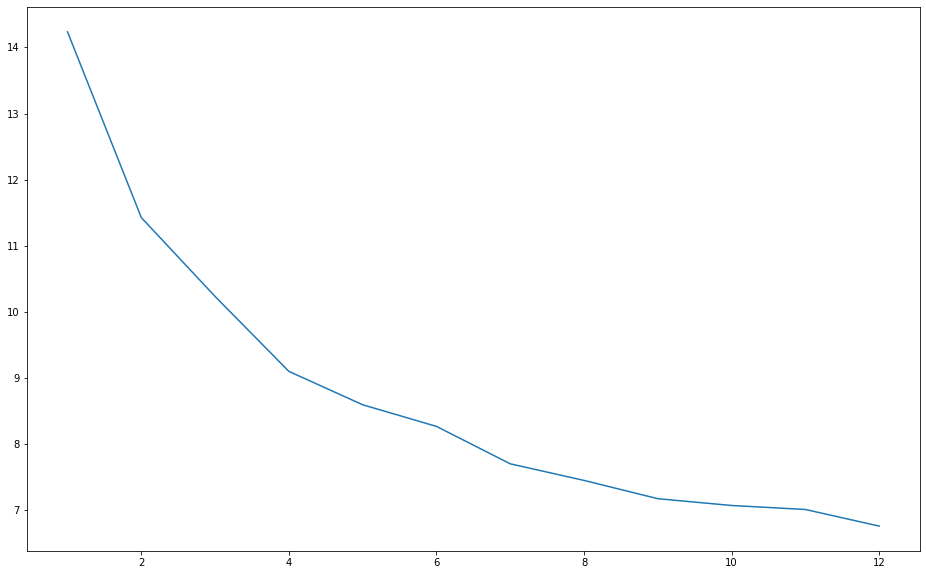

In [ ]:
#implement elbow method from scratch

def elbow():
  distances = np.zeros((13,X_train.shape[0]))
  for c in range(1,13):
    k = Kmeans()
    k.fit(X_train,y_train,c)
    k.train(10)
    centers = k.get_centers()
    
    j=0
    for x in X_train:
      i=0
      dist = np.zeros(centers.shape[0])
      for y in centers:
        dist[i] = np.sum((x-y)**2)**0.5
        i=i+1
      distances[c][j] = np.min(dist)
      j=j+1
  mean_dist = np.mean(distances,axis=1)
  plt.figure(figsize=(16,10))
  x_axis = [x for x in range(1,13)]
  plt.plot(x_axis,mean_dist[1:])
  plt.show()
  
  
elbow()

2.4548095946215548e-05
3.479207295085549e-05
5.495609353229765e-05
6.039747103686669e-05
7.769110790368249e-05
8.661167127476462e-05
9.450115233881285e-05
0.00010402045464427443
0.00011567524520191232
0.0001316033473946406


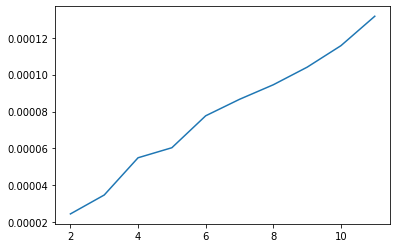

In [ ]:
#implement silhouette method from scratch
def compute_distances(b,a):
  distances = -2 * b@a.T + np.sum(a**2,axis=1) +np.sum(b**2,axis=1)[:,np.newaxis]
  return distances


def get_dist(X_train,indices1,indices2):
  dist = compute_distances(X_train[indices1, :] , X_train[indices2,:])
  return np.mean(np.mean(dist,axis=1))

def silhouette():
  silhouette_scores = []
  for c in range(2,12):
    k = Kmeans()
    k.fit(X_train,y_train,c,init='random-partition')
    k.train(10)
    centers = k.get_centers()
    nearest_centers = np.zeros((c,c))
    for i in range(c):
      for j in range(c):
        nearest_centers[i][j] = np.sum((centers[i]-centers[j])**2)**0.5
        if nearest_centers[i][j] ==0:
          nearest_centers[i][j]=2333332323232 #Random Large Number INT_MAX

    nearest_centers = np.argmin(nearest_centers,1)
    labels = k.get_labels()
    coeffi = np.zeros(X_train.shape[0])
    indices = []
    for i in range(c):
      indices.append(np.argwhere(labels==i).flatten())
    
    for i in range(c):
      a = get_dist(X_train,indices[i],indices[i])
      b = get_dist(X_train,indices[nearest_centers[i]],indices[i])
      coeffi[i] = (b - a) / max(b,a)

    print(np.mean(coeffi))
    silhouette_scores.append(np.mean(coeffi))
  plt.figure()
  plt.plot([x for x in range(2,12)],silhouette_scores)
  plt.show()

silhouette()

In [ ]:
k = Kmeans()
k.fit(X_train,y_train,10,init='random-partition')
k.train(10)
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.4625515180174657, 0.46817270885167894, 0.4653451385963321)

In [ ]:
k = Kmeans()
k.fit(X_train,y_train,10)
k.train(10)
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.47106006626634156, 0.48684329262946074, 0.4788216505508751)

In [ ]:
k = Kmeans()
k.fit(X_train,y_train,10,init='forgy')
k.train(10)
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.44684470109494456, 0.4524852269462897, 0.44964727555563466)

In [ ]:
k = Kmeans()
k.fit(X_train,y_train,10,init='forgy')
k.train(10,'manhattan')
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.47933068550978325, 0.4854225415421429, 0.48235738026046143)

In [ ]:
k = Kmeans()
k.fit(X_train,y_train,10)
k.train(10,'manhattan')
ypredict = k.get_prediction()
homogeneity_completeness_v_measure(y_train,ypredict)

(0.5069746098816242, 0.5129104984703547, 0.5099252802825631)

In [ ]:
t = TSNE(learning_rate=50)
t_features = t.fit_transform(X_train)
t_features

array([[ 29.246138 ,  -7.9011917],
       [ 25.275558 , -19.052498 ],
       [  6.506582 ,  -9.317986 ],
       ...,
       [ 17.82467  ,   4.722626 ],
       [-17.018122 , -11.653462 ],
       [-20.08117  , -19.735788 ]], dtype=float32)

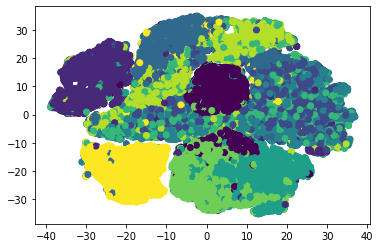

In [ ]:
x = t_features[:,0]
y = t_features[:,1]
plt.figure()
plt.scatter(x,y ,c=y_train)
plt.show()

# OBSERVATION
- We can observe from the elbow method and silhouette method that k=10 can be choosen as optimal cluster number . This is be observed in both the latent space as well as actual data set.
- From the above homogeneity_completeness_v_measure score we can conclude that the latent space has slightly less accuracy than the acutual dataset but it takes much less time in computation.